# Null Model
The null model shows us how bad guesser would score on the given task. For some tasks, such as tumor detection, it is easy to find non-tumor by guessing everything is a non-tumor since tumor is so rare. Thus the null model shows the baseline ROC curve.

In [13]:
import numpy as np

In [1]:
import sys
sys.path.append('../../')

In [2]:
import datas.income2023f as income2023f

Loading Data
Finished Loading Data


In [47]:
income2023f.train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,Private,83451,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0
24996,64,Local-gov,202738,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,0
24997,39,Private,225544,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Poland,0
24998,53,Private,346871,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Male,4787,0,46,United-States,1


In [53]:
income2023f.train['income>50K']

0        1
1        1
2        0
3        0
4        0
        ..
24995    0
24996    0
24997    0
24998    1
24999    0
Name: income>50K, Length: 25000, dtype: int64

In [25]:
y_true = np.array(list(income2023f.train['income>50K']))

In [17]:
threshold = 0.5
guesses = np.random.uniform(low=0, high=1, size=len(income2023f.train))>threshold

In [26]:
guesses.shape, y_true.shape

((25000,), (25000,))

In [20]:
import scikitplot as skplt

In [42]:
y_true_bar = np.mean(y_true)
y_true_bar

0.24064

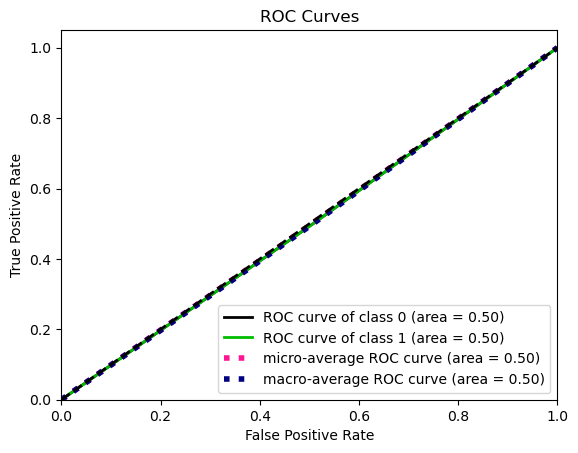

In [46]:
ax = skplt.metrics.plot_roc(
    y_true,
    np.array([
        1-guesses,
        guesses
    ]).T
)

In [61]:
len(income2023f.test)

23842

In [62]:
import pandas as pd

In [63]:
pd.DataFrame(
    {
        'ID': list(range(1, 23843)),
        'Prediction':np.random.uniform(low=0, high=1, size=len(income2023f.test))
    }
).to_csv('./null_model_test_predictions.csv', index=False)